In [1]:
# Change this to whatever your directory you're working from is - this should be
# the head level with Code and Data directories.
main_path = '/content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/'

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np
from keras import models
from keras import layers
from keras.layers import Dropout
import random as python_random
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from google.colab import files
import sklearn.preprocessing
import scipy
from tensorflow.keras import regularizers

import sys
import importlib
import pickle

# set seeds
np.random.seed(768)
python_random.seed(869)
tf.random.set_seed(1234)

from google.colab import drive
drive.mount('/content/drive')

sys.path.append(main_path+"Code")
import vep
importlib.reload(vep)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<module 'vep' from '/content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/Code/vep.py'>

In [50]:
# Here's our model that we're going to be working with
def build_nn_model_3(model_val):
  
  # Build our specified model
  model = models.Sequential()

  #l2_val = 0.025
  l2_val = 0.025
  dropout_val = 0.4
  model.add(layers.Dense(50, input_shape=(105,),activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(dropout_val))
  model.add(layers.Dense(25, activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(dropout_val))
  model.add(layers.Dense(2, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

  nepochs = 200
  history = model.fit(model_val.X_train,
                    model_val.Y_train,
                    epochs=nepochs,
                    batch_size=512,
                    validation_data=(model_val.X_val,model_val.Y_val)
                    )
  model_val.nn_model = model
  model_val.nn_history = history
  return model, history

## Run for our clustered train/test split

In [47]:
# File path for the protein encodings dictionary
prot_enc_file = main_path+'Data/protein_full_length_encodings.pickle'

# Locations of input data with the clustered shuffling
data_dir = main_path+'Data/'
train_file = data_dir+'train_processed_clinvar_seqs_with_clusters_clustershuffle.csv'
val_file = data_dir+'validate_processed_clinvar_seqs_with_clusters_clustershuffle.csv'
test_file = data_dir+'test_processed_clinvar_seqs_with_clusters_clustershuffle.csv'

# Instantiate our Model3 class, passing in the location of the protein 
# dictionary of encodings
m3 = vep.Model3(prot_enc_file)

# Process our input and output
m3.process_input_and_output_training(train_file,val_file,test_file)

The categories are: [array(['benign', 'pathogenic'], dtype='<U10')]


In [51]:
# Let's run our model!
build_nn_model_3(m3)

Epoch 1/200
10/10 [==============================] - 1s 25ms/step - loss: 3.4563 - categorical_accuracy: 0.5368 - val_loss: 3.1641 - val_categorical_accuracy: 0.5758
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 3.3627 - categorical_accuracy: 0.5376 - val_loss: 3.0808 - val_categorical_accuracy: 0.5934
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 3.2403 - categorical_accuracy: 0.5414 - val_loss: 3.0021 - val_categorical_accuracy: 0.6263
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 3.1448 - categorical_accuracy: 0.5601 - val_loss: 2.9280 - val_categorical_accuracy: 0.6263
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 3.0533 - categorical_accuracy: 0.5621 - val_loss: 2.8572 - val_categorical_accuracy: 0.6288
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 2.9860 - categorical_accuracy: 0.5535 - val_loss: 2.7873 - val_categorical_accuracy: 0.6338
Epoch 7/2

(<keras.engine.sequential.Sequential at 0x7f72cea43d50>,
 <keras.callbacks.History at 0x7f72ce9dea90>)

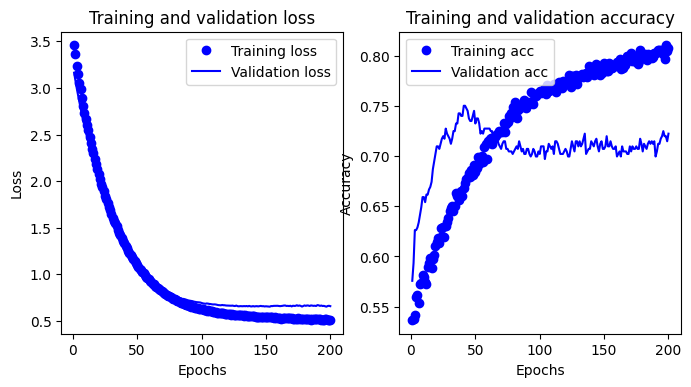

In [52]:
m3.plot_accuracy_and_loss()

In [53]:
m3.nn_model.save_weights(main_path+'Code/Trained_Model_Weights/model3_clustershuffle.h5')

In [76]:
# Get our accuracy for our test set
m3.nn_model.evaluate(m3.X_test,m3.Y_test)

21/21 [==============================] - 0s 1ms/step - loss: 0.6882 - categorical_accuracy: 0.6997


[0.6882104277610779, 0.6996904015541077]

## Now try for our random shuffling

In [67]:
# Here's our model that we're going to be working with - using a different 
# function because less obvious overfitting
def build_nn_model_3_random(model_val):
  
  # Build our specified model
  model = models.Sequential()

  #l2_val = 0.025
  l2_val = 0.025
  dropout_val = 0.4
  model.add(layers.Dense(50, input_shape=(105,),activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(dropout_val))
  model.add(layers.Dense(25, activation='relu', kernel_regularizer=regularizers.L2(l2=l2_val)))
  model.add(Dropout(dropout_val))
  model.add(layers.Dense(2, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

  nepochs = 800
  history = model.fit(model_val.X_train,
                    model_val.Y_train,
                    epochs=nepochs,
                    batch_size=512,
                    validation_data=(model_val.X_val,model_val.Y_val)
                    )
  model_val.nn_model = model
  model_val.nn_history = history
  return model, history

In [68]:
# File path for the protein encodings dictionary
prot_enc_file = main_path+'Data/protein_full_length_encodings.pickle'

# Locations of input data with the clustered shuffling
data_dir = main_path+'Data/'
train_file = data_dir+'train_processed_clinvar_seqs_random.csv'
val_file = data_dir+'validate_processed_clinvar_seqs_random.csv'
test_file = data_dir+'test_processed_clinvar_seqs_random.csv'

# Instantiate our Model3 class, passing in the location of the protein 
# dictionary of encodings
m3_rand = vep.Model3(prot_enc_file)

# Process our input and output
m3_rand.process_input_and_output_training(train_file,val_file,test_file)

The categories are: [array(['benign', 'pathogenic'], dtype='<U10')]


In [69]:
# Let's run our model!
build_nn_model_3_random(m3_rand)

Epoch 1/800
10/10 [==============================] - 1s 24ms/step - loss: 3.5082 - categorical_accuracy: 0.5597 - val_loss: 3.1978 - val_categorical_accuracy: 0.5767
Epoch 2/800
10/10 [==============================] - 0s 7ms/step - loss: 3.3815 - categorical_accuracy: 0.5539 - val_loss: 3.1084 - val_categorical_accuracy: 0.5880
Epoch 3/800
10/10 [==============================] - 0s 8ms/step - loss: 3.2980 - categorical_accuracy: 0.5678 - val_loss: 3.0258 - val_categorical_accuracy: 0.5929
Epoch 4/800
10/10 [==============================] - 0s 7ms/step - loss: 3.1918 - categorical_accuracy: 0.5694 - val_loss: 2.9486 - val_categorical_accuracy: 0.6010
Epoch 5/800
10/10 [==============================] - 0s 8ms/step - loss: 3.0894 - categorical_accuracy: 0.5628 - val_loss: 2.8755 - val_categorical_accuracy: 0.6155
Epoch 6/800
10/10 [==============================] - 0s 7ms/step - loss: 2.9942 - categorical_accuracy: 0.5723 - val_loss: 2.8056 - val_categorical_accuracy: 0.6187
Epoch 7/8

(<keras.engine.sequential.Sequential at 0x7f72cea9b8d0>,
 <keras.callbacks.History at 0x7f72ce6d3a10>)

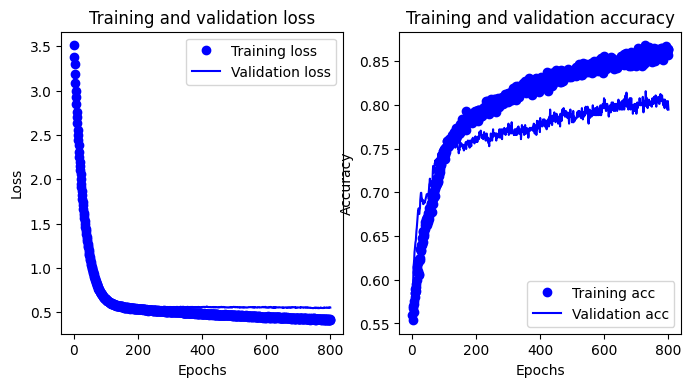

In [70]:
m3_rand.plot_accuracy_and_loss()

In [73]:
m3_rand.nn_model.save_weights(main_path+'Code/Trained_Model_Weights/model3_random.h5')

In [75]:
# Get our accuracy for our test set
m3_rand.nn_model.evaluate(m3_rand.X_test,m3_rand.Y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.5117 - categorical_accuracy: 0.8098


[0.511699378490448, 0.8098471760749817]